# Курсовой проект
### Сравнительный анализ эффективности различных типов молекулярных дескрипторов для предсказания свойств молекул
#### Дашкевич Матвей

## Введение

Разработка лекарств --- это долгий и дорогой процесс. Консалтинговые компании оценивают, что для разработки успешного препарата нужно потратить несколько миллиардов долларов, и занимает это обычно свыше 10 лет.

У процесса разработки лекарств можно выделить следующие стадии:
- Поиск мишени --- макромолекулы (обычно белка), связанному с определённой функцией, нарушение которой приводит к заболеванию.
- Поиск лигандов --- молекул, способных связываться с мишенью (потенциальных лекарств).
- Оптимизация лигандов (из найденных лигандов отбираются удовлетворяющие неким свойствам, лиганды модифицируются).
- Доклинические испытания, в ходе которых оценивается токсичность, мутагенность, тератогенность и другие нежелательные эффекты.
- Клинические испытания --- проверка лекарств на людях.

<figure>
    <img src="images/pipeline.png" width="1000" alt="pipeline">
    <figcaption>Процесс разработки лекарств</figcaption>
</figure>

В последние годы на помощь традиционным методам разработки лекарств приходит машинное обучение  ---  дисциплина о компьютерных алгоритмах, улучшающихся посредством опыта и использования данных, для того, чтобы делать предсказания или принимать решения не будучи явно запрогаммированы это делать.

Примеры использования машинного обучения в разработке лекарств: 
- Идентификация и приоритезация мишени, основываясь на взаимосвязи генов и болезней.
- Предсказание того, будет ли мишень хорошо связываться с лигандом.
- Идентификация альтернативной мишени.
- Конструирование лиганда с заданными свойствами.
- Виртуальный скриниг, в частности молекулярный докинг.

Методы машинного обучения значительно расширяют возможности фармацевтической индустрии, ускоряя и удешевляя создание новых терапевтических средств, а зачастую и позволяя в принципе приблизиться к лечению важнейших заболеваний.

Для того, чтобы можно было применить к молекулам потенциальных лекарств методы машинного обучения, требуется определённым образом эти молекулы закодировать, например в виде вектора из чисел. Способы такого представления молекул называются молекулярными дескрипторами.

Встаёт следующий вопрос: какие способы представления молекул лучше всего подходят для решения той или иной задачи предсказания свойств молекул. В ходе этой работы будет проведено сравнение некоторых таких способов (а именно: дескрипторов MACCS и Morgan для решения задачи предсказания энергии связывания мишени с лигандом. Энергия связывания показывает, насколько хорошо лиганд стыкуется с мишенью. В качестве мишени будет рассмотрен белок gp120 --- наружный белок вируса иммунодефицита человека, играющий важную роль в процессе проникновения вируса в клетку.

<figure>
    <img src="images/gp120.png" width="500" alt="hiv">
    <figcaption>Строение ВИЧ</figcaption>
</figure>

## Способы представления молекул

### SMILES

SMILES (Simplified Molecular Input Line Entry System) --- система правил однозначного описания состава и структуры молекулы химического вещества с использованием строки символов ASCII. Строка символов, составленная по правилам SMILES, может быть преобразована многими молекулярными редакторами в двумерную или трёхмерную структурную формулу молекулы.

Основные принципы SMILES:
- Записи SMILES компактны, в них нет пробелов.
- SMILES --- это язык с определённым словарём, синтаксисом и семантикой. То есть он независим от использующих его компьютерных систем и языков.
- SMILES представляет структуру в терминах атомов и связей, базовых составляющих, что позволяет ему быть *lingua franca* для других способов представления молекул. 
- SMILES использует для записи атомов только символы из переодической таблицы.
- SMILES использует символы дефиса, равенства и решётку для записи связей: одинарных, двойных и тройных соответственно. Дополнительно точка обозначает отсутствие связи.
- Атомы в составе ароматических циклов обычно записываются строчными буквами вместо прописных.
- Боковые цепи молекулы заключаются в круглые скобки. Например, пропионовая кислота записывается как **CCC(=O)O**.
- Атомы, находящиеся на концах разорванной при построении остовного леса связи, обозначаются одним и тем же номером. Например, циклогексан записывается как **C1CCCCC1**, а бензол — как **c1ccccc1**.
- SMILES может быть записан однозначно.

<figure>
    <img src="images/smiles.png" width="700" alt="smiles">
    <figcaption>SMILES ципрофлоксацина</figcaption>
</figure>

### Молекулярные дескрипторы

Молекулярные дескрипторы предназначены для формального представления химических соединений в виде бинарных векторов фиксированной длины, что позволяет использовать такое представление для решения различных задач анализа и синтеза соединений методами машинного обучения.

Существует множество молекулярных дескрипторов. Чаще всего их классифицирует в соответствии с их размерностью. Одномерные дескрипторы передают некие физические и химические показатели, например молекулярный вес. Двумерные получают по 2D представлению молекулы, а трёхмерные --- по 3D структуре (то есть по трёхмерным координатам молекулы). Мы сфокусируемся на двумерных дескрипторах (фингерпринтах).

Существуют различные типы фингерпринтов. Например, структурные (*Structural*), хэшированные (*Hashed*), путевые (*Path-based*), круговые (*Circular*). Среди доступных фингерпринтов нет одинаково хорошо подходящих для решения любой задачи.

### Структурные дескрипторы

В структурных дескрипторах молекула кодируется в бинарный вектор, в котором каждый бит соответсвует заранее определённому структурному признаку (подструктуре или фрагменту). Если такой признак есть, то бит равен единице, а иначе --- нулю. В качестве примера такого дескриптора можно привести MACCS дескриптор.

<figure>
    <img src="images/substructure_fp.png" width="700" alt="substructure_fp">
    <figcaption>Принцип построения MACCS</figcaption>
</figure>

MACCS (Molecular ACCess System) дескрипторы являются одними из самых часто используемых. Они иногда называются также MDL дескрипторы, по имени разработавших их компании. Существует два типа MACCS дескрипторов, один длиной 960, другой длиной 166. Лишь второй доступен публично. Он реализован такими свободными библиотеками как RDKit и OpenBabel. 

<figure>
    <img src="images/maccs.png" width="700" alt="maccs">
    <figcaption>Пример MACCS фингерпринта для ципрофлоксацина</figcaption>
</figure>

### Круговые дескрипторы

Круговые фингерпринты генерируются по о*круж*ению каждого атома в некотором радиусе. Примером круговых фингерпринтов служат фингерпринты расширенной связи (*ECFPs*). Разновидности ECFPs могут быть получены выбором различных значений диаметра. Например, для диаметров 2, 4, 6, соответственно ECFP2, ECFP4, ECFP6.

<figure>
    <img src="images/morgan_64.png" width="700" alt="morgan_64">
    <figcaption>Пример Morgan фингерпринт радиуса 2 (также известный как ECFP4) для ципрофлоксацина</figcaption>
</figure>

## Использованные библиотеки

Для получения дескрипторов молекул по их SMILES была использована библиотека RDKit --- сборник программного обеспечения для хемоинформатики, написанный на C++ и Python и распространяемый под свободной лицензией BSD.

In [1]:
!pip install --upgrade pip

!pip install rdkit-pypi

!pip install pandas
!pip install seaborn
!pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize': (16, 5), 'axes.facecolor': 'white', 'figure.facecolor': 'white'}, style='whitegrid')

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [5]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score

Дополнительно к библиотечным метрикам *r-squared*, *mean absolute error*, *max error* была реализована собственная метрика:

In [6]:
def score_func(y_true, y_pred):
    return np.percentile(y_true - y_pred, 80)

max_perc_score = make_scorer(score_func, greater_is_better=False)

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
from rdkit.Chem import MolFromSmiles
from rdkit.DataStructs.cDataStructs import ExplicitBitVect
from rdkit.Chem.AllChem import GetMACCSKeysFingerprint, GetMorganFingerprintAsBitVect

## Подготовка данных

### Лиганды и их энергия связывания

В качестве входных данных для моделей машинного обучения были использованы SMILES лигандов для белка gp120 вместе с их энергиями связывания в ккал/моль, предварительно рассчитанными с помощью Autodock Vina.

In [9]:
df_gp120 = pd.read_csv('data/gp120.csv', usecols=['energy', 'smiles'])
df_gp120

,energy,smiles
0,-6.5,CCC[C@@H]1C(C[C@H](O)CC)=NNN1Cc1ccc(OCC)cc1
1,-5.6,CCOC(=O)C(=O)[C@H]1C(C2=C(OC)CCCC2)=NNN1c1ccc(...
2,-5.6,NCC1=NNN(c2ccc(C(=O)C=O)cc2)[C@@H]1CCc1ccccc1
3,-6.9,CC(C)(C)OC(=O)NCC1=NNN(c2cccc(CO)c2)[C@@H]1C(=O)O
4,-7.0,CC[C@H](C)C1=NNN(C[C@@H]2COc3ccccc3O2)[C@H]1C(...
...,...,...
14877,-7.8,CCc1ccc([C@H](CO)NCC2=NNN(C[C@H]3COc4ccccc4O3)...
14878,-6.9,COc1ccccc1[C@H]1C(CON)=NNN1C1=NS(=O)(=O)c2ccccc21
14879,-5.8,CCN1C2=CC=CCC2=CC=C1N1NN=C(C)[C@@H]1C1=C(C=O)CCC1
14880,-6.1,C#C[C@](C)(c1ccccc1)N1NN=C(CCCC)[C@@H]1[C@H]1O...


In [10]:
pd.isnull(df_gp120).any()

energy    False
smiles    False
dtype: bool

Распределение энергии связывания близко к нормальному со средним $-6.95$, среднеквадратическим отклонением $0.88$ и диапазоном от $-10.1$ до $-4.7$

<AxesSubplot:>

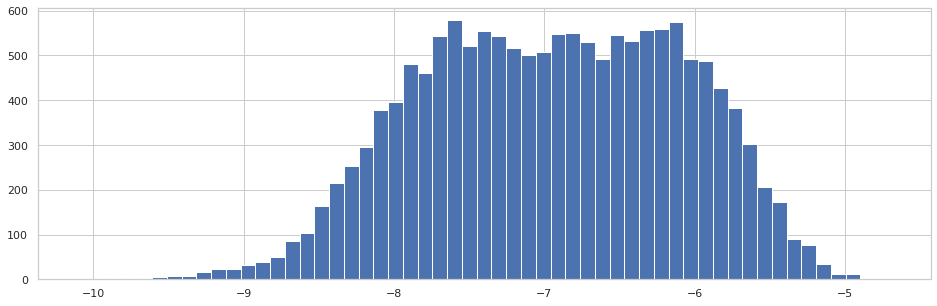

In [11]:
df_gp120.energy.hist(bins=55)

In [12]:
df_gp120.energy.describe()

count    14882.000000
mean        -6.945935
std          0.878445
min        -10.100000
25%         -7.600000
50%         -6.900000
75%         -6.200000
max         -4.700000
Name: energy, dtype: float64

### Получение фингерпринтов

Ниже представлен программный код генерации фингерпринтов MACCS по SMILES исходных молекул. Аналогично получаем фингерпринты Morgan радиуса 2.

Результат применения функций из rdkit представляет собой вектора из нулей и единиц для каждой молекулы. Из них получаем датафрейм, в котором каждому номеру символа таких векторов соответствует столбец, а каждой молекуле --- строка.

In [13]:
mols = [MolFromSmiles(s) for s in df_gp120.smiles]

In [14]:
fp_maccs = [0] * len(mols)

for i, m in enumerate(mols):
    fp_maccs[i] = ExplicitBitVect.ToBitString(GetMACCSKeysFingerprint(m))

In [15]:
df_maccs_raw = pd.DataFrame(index=range(len(fp_maccs)), columns=range(len(fp_maccs[0])))

for i in range(len(df_maccs_raw.index)):
    df_maccs_raw.iloc[i] = list(map(int, fp_maccs[i]))
    
df_maccs_raw

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14877,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
14878,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
14879,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,1,1,0
14880,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,0


In [16]:
fp_morgan = [0] * len(mols)

for i, m in enumerate(mols):
      fp_morgan[i] = ExplicitBitVect.ToBitString(GetMorganFingerprintAsBitVect(m, 2))

In [17]:
df_morgan_raw = pd.DataFrame(index=range(len(fp_morgan)), columns=range(len(fp_morgan[0])))

for i in range(len(df_morgan_raw.index)):
    df_morgan_raw.iloc[i] = list(map(int, fp_morgan[i]))
    
df_morgan_raw

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14877,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Преобразование фингерпринтов

Между колонками-признаками датафреймов с дескрипторами имеется заметная множественная корреляция. Чтобы улучшить ситуацию, воспользуемся методом главных компонет: спроецируем данные на размерности с наибольшей дисперсией.

Такое преобразование не помешает сравнению эффективности дескрипторов, если процент объяснённой дисперсии у обоих фингерпринтов взять одинаковый, например 90 процентов.

#### Для MACCS

In [18]:
df_maccs_transformed = StandardScaler().fit_transform(df_maccs_raw)
pca = PCA(n_components=0.9)
df_maccs = pd.DataFrame(pca.fit_transform(df_maccs_transformed))

In [19]:
df_maccs

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-1.991589,-1.553125,-3.254613,-2.465029,-0.262539,-1.426023,0.014521,0.838775,1.035257,-1.249203,...,0.150604,0.475667,0.283370,-0.029695,-1.113272,1.025332,-0.390300,0.286295,0.072062,-0.515517
1,0.015260,4.978339,-3.486020,7.241766,0.781737,0.008548,1.399448,4.007923,-0.035242,-1.209198,...,-0.170280,-1.156188,-1.216891,0.677772,0.439634,0.063328,0.243848,-0.496617,0.322197,-0.997802
2,-1.074476,0.928877,0.814186,-1.188665,2.073327,0.832787,-2.119414,-2.005714,-1.146538,0.488795,...,1.388981,0.224922,0.103128,0.259616,0.297214,0.688677,-1.674385,0.682885,-0.157840,1.260625
3,-0.105549,1.367211,-1.004831,-2.566319,-2.161147,2.516190,0.190690,4.279604,0.236742,2.100532,...,-0.730563,0.677579,-1.337108,0.952753,0.718385,0.609695,0.305499,-0.848397,-1.456133,-0.732971
4,-1.110399,-0.396596,-3.888991,0.367677,-3.859095,0.403492,-0.622758,-0.162236,0.930140,-1.798000,...,-0.187809,0.247920,1.520272,1.051739,-0.464703,-0.290143,-0.261708,-0.876344,-0.012201,-0.728245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14877,-1.647197,-0.881278,-4.186158,-1.010457,-1.356072,0.229877,0.737414,-2.551883,-0.327395,1.009086,...,0.522802,1.295011,0.397883,-0.043196,-0.126495,0.528393,-0.102793,1.386930,0.097681,0.108291
14878,14.178419,0.580822,-2.939053,0.428119,0.276216,1.928808,0.718175,-0.252725,-0.252138,-1.883757,...,-1.301643,0.425674,-0.198846,-0.741171,0.455948,0.180017,0.692851,-0.780275,0.609125,-0.515621
14879,-1.425306,-6.830763,3.682882,5.855518,1.047756,1.097181,0.213207,0.501635,-0.588009,-0.777537,...,1.361614,0.366501,0.149308,-0.268084,1.431480,-0.825996,-0.343771,-0.648806,-0.128254,0.207106
14880,-1.182588,-0.633223,1.041162,-0.917881,-2.041819,-4.879737,-1.575052,2.070870,-0.071427,-0.135339,...,0.614268,-0.308275,-0.083047,1.794609,0.076983,1.004270,0.643387,-0.605811,-1.105646,0.098792


In [20]:
sum(pca.explained_variance_ratio_)

0.9017343395915365

#### Для Morgan

In [21]:
df_morgan_transformed = StandardScaler().fit_transform(df_morgan_raw)
pca = PCA(n_components=0.9)
df_morgan = pd.DataFrame(pca.fit_transform(df_morgan_transformed))

In [22]:
df_morgan

,0,1,2,3,4,5,6,7,8,9,...,749,750,751,752,753,754,755,756,757,758
0,-0.907998,-0.326361,2.509258,0.603699,-0.609833,0.270167,-1.268939,1.739931,0.490681,1.918173,...,-0.122370,-0.318655,-0.051879,0.537901,0.792013,-0.307227,0.007397,-0.055104,0.428731,0.077987
1,-0.232965,2.202027,-2.198502,1.414625,0.421343,5.826403,3.425454,5.058886,-3.307435,0.436880,...,0.466157,1.630875,1.174135,-0.001073,1.399297,-0.261938,-0.739536,-0.483205,-0.176433,-0.757240
2,-0.781501,0.803982,-0.796704,-0.705296,0.226236,1.671033,-0.111939,3.294637,0.623728,-0.057842,...,3.372810,-0.795524,-0.146628,-0.414360,1.021868,-2.176412,-0.591397,1.045638,-1.963504,-1.043506
3,0.634144,1.946768,-0.310336,-0.727075,0.231184,1.340657,0.193184,1.216390,0.577063,-0.710786,...,0.560703,0.423396,0.066237,0.454572,0.475338,0.042117,0.533075,0.286719,-0.106751,-0.321169
4,-2.342148,-4.307813,-1.531669,10.344352,-1.115489,-4.905705,1.532576,-2.487777,-0.326138,0.316620,...,-0.100255,-0.224349,0.201731,1.392999,0.317947,0.080995,0.526622,-1.687553,0.481665,0.524896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14877,-3.236728,-3.776356,0.731313,11.242042,-0.818368,-4.978538,1.276018,-2.196360,0.133484,0.072172,...,1.218419,-0.044956,0.596920,-0.267721,0.238718,0.025845,0.720587,-0.495549,0.391545,0.319638
14878,-0.454414,1.960780,-5.078403,-4.638245,15.000135,-9.958319,4.506625,3.070150,1.333184,1.545379,...,0.763653,0.540172,-0.237283,-0.341849,-0.216727,-0.084384,-0.690028,0.338033,0.101633,1.175854
14879,15.297396,1.816173,0.573599,2.291367,-0.149496,-0.411799,-1.377945,0.570640,0.545178,0.490377,...,0.420866,-0.477228,0.240083,-0.739634,0.416140,-0.147468,-0.029096,0.155589,-0.318747,0.093848
14880,-0.915233,-2.589119,-0.373830,-1.779382,3.155999,2.191517,-7.157706,-3.415802,-2.031069,-7.762990,...,-2.393818,0.272271,-0.936291,-0.702117,-0.924126,0.112363,-1.344059,2.085546,1.920558,1.250518


In [23]:
sum(pca.explained_variance_ratio_)

0.9000440591593575

## Обучение

Для обоих дескрипторов, для всех взятых из scikit-learn моделей машинного обучения, будем для обучения и оценки качества модели использовать кросс-валидацию с числом фолдов равным 10.

### По MACCS дескриптору

In [24]:
X = df_maccs
y = df_gp120['energy']

#### Линейная регрессия

In [25]:
model = LinearRegression()

In [26]:
maccs_lr = pd.DataFrame(
    cross_validate(
        model, X, y, cv=10, 
        scoring={
            'r2': 'r2', 
            'nmae': 'neg_mean_absolute_error', 
            'me': 'max_error', 
            'mps': max_perc_score
        }
    )
).drop(columns=['fit_time', 'score_time'])

#### Дерево решений

In [27]:
model = DecisionTreeRegressor()

In [28]:
maccs_dt = pd.DataFrame(
    cross_validate(
        model, X, y, cv=10, 
        scoring={
            'r2': 'r2', 
            'nmae': 'neg_mean_absolute_error', 
            'me': 'max_error', 
            'mps': max_perc_score
        }
    )
).drop(columns=['fit_time', 'score_time'])

#### Случайный лес

In [29]:
model = RandomForestRegressor(n_estimators=10)

In [30]:
maccs_rf = pd.DataFrame(
    cross_validate(
        model, X, y, cv=10, 
        scoring={
            'r2': 'r2', 
            'nmae': 'neg_mean_absolute_error', 
            'me': 'max_error', 
            'mps': max_perc_score
        }
    )
).drop(columns=['fit_time', 'score_time'])

#### Метод опорных векторов

In [31]:
model = SVR()

In [32]:
maccs_svm = pd.DataFrame(
    cross_validate(
        model, X, y, cv=10, 
        scoring={
            'r2': 'r2', 
            'nmae': 'neg_mean_absolute_error', 
            'me': 'max_error', 
            'mps': max_perc_score
        }
    )
).drop(columns=['fit_time', 'score_time'])

#### Метод k-ближайших соседей

In [33]:
model = KNeighborsRegressor()

In [34]:
maccs_knn = pd.DataFrame(
    cross_validate(
        model, X, y, cv=10, 
        scoring={
            'r2': 'r2', 
            'nmae': 'neg_mean_absolute_error', 
            'me': 'max_error', 
            'mps': max_perc_score
        }
    )
).drop(columns=['fit_time', 'score_time'])

### По Morgan дескриптору

In [35]:
X = df_morgan
y = df_gp120['energy']

#### Линейная регрессия

In [36]:
model = LinearRegression()

In [37]:
morgan_lr = pd.DataFrame(
    cross_validate(
        model, X, y, cv=10, 
        scoring={
            'r2': 'r2', 
            'nmae': 'neg_mean_absolute_error', 
            'me': 'max_error', 
            'mps': max_perc_score
        }
    )
).drop(columns=['fit_time', 'score_time'])

#### Дерево решений

In [38]:
model = DecisionTreeRegressor()

In [39]:
morgan_dt = pd.DataFrame(
    cross_validate(
        model, X, y, cv=10, 
        scoring={
            'r2': 'r2', 
            'nmae': 'neg_mean_absolute_error', 
            'me': 'max_error', 
            'mps': max_perc_score
        }
    )
).drop(columns=['fit_time', 'score_time'])

#### Случайный лес

In [40]:
model = RandomForestRegressor(n_estimators=10)

In [41]:
morgan_rf = pd.DataFrame(
    cross_validate(
        model, X, y, cv=10, 
        scoring={
            'r2': 'r2', 
            'nmae': 'neg_mean_absolute_error', 
            'me': 'max_error', 
            'mps': max_perc_score
        }
    )
).drop(columns=['fit_time', 'score_time'])

#### Метод опорных векторов

In [42]:
model = SVR()

In [43]:
morgan_svm = pd.DataFrame(
    cross_validate(
        model, X, y, cv=10, 
        scoring={
            'r2': 'r2', 
            'nmae': 'neg_mean_absolute_error', 
            'me': 'max_error', 
            'mps': max_perc_score
        }
    )
).drop(columns=['fit_time', 'score_time'])

#### Метод k-ближайших соседей

In [44]:
model = KNeighborsRegressor()

In [45]:
morgan_knn = pd.DataFrame(
    cross_validate(
        model, X, y, cv=10, 
        scoring={
            'r2': 'r2', 
            'nmae': 'neg_mean_absolute_error', 
            'me': 'max_error', 
            'mps': max_perc_score
        }
    )
).drop(columns=['fit_time', 'score_time'])

## Сравнение

### Сравнение моделей для MACCS дескриптора

#### По метрике r-squared

<AxesSubplot:>

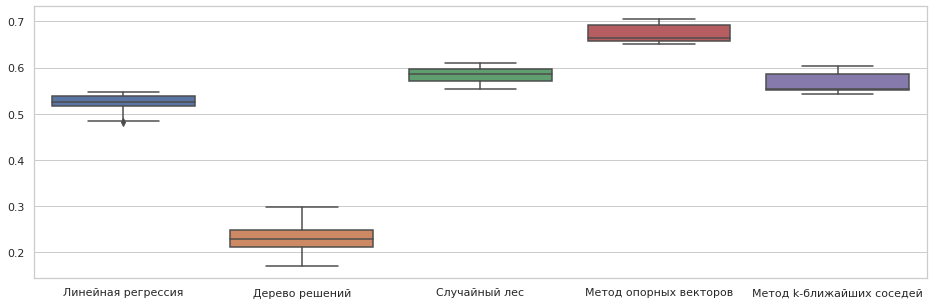

In [46]:
sns.boxplot(
    data=pd.DataFrame(
        data={
            'Линейная регрессия': maccs_lr['test_r2'], 
            'Дерево решений': maccs_dt['test_r2'],
            'Случайный лес': maccs_rf['test_r2'],
            'Метод опорных векторов': maccs_svm['test_r2'],
            'Метод k-ближайших соседей': maccs_knn['test_r2'],
        }
    )
)

#### По метрике mean absolute error

<AxesSubplot:>

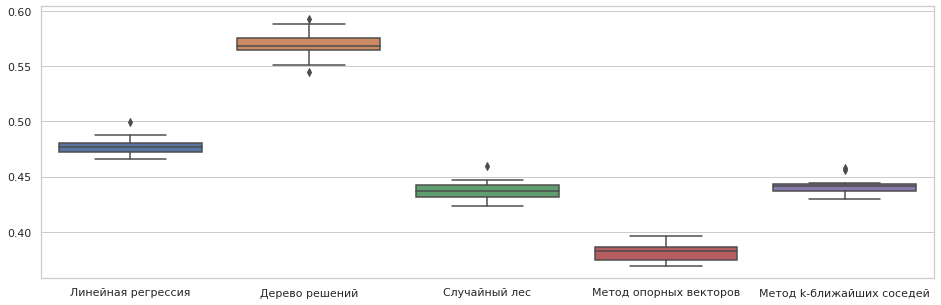

In [47]:
sns.boxplot(
    data=pd.DataFrame(
        data={
            'Линейная регрессия': -maccs_lr['test_nmae'], 
            'Дерево решений': -maccs_dt['test_nmae'],
            'Случайный лес': -maccs_rf['test_nmae'],
            'Метод опорных векторов': -maccs_svm['test_nmae'],
            'Метод k-ближайших соседей': -maccs_knn['test_nmae'],
        }
    )
)

#### По метрике max error

<AxesSubplot:>

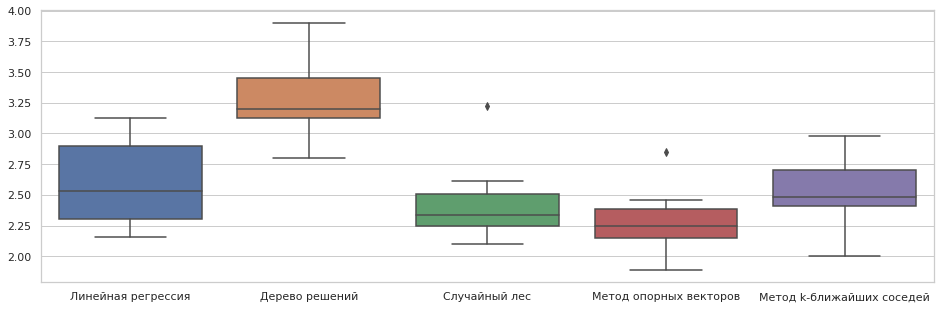

In [48]:
sns.boxplot(
    data=pd.DataFrame(
        data={
            'Линейная регрессия': -maccs_lr['test_me'], 
            'Дерево решений': -maccs_dt['test_me'],
            'Случайный лес': -maccs_rf['test_me'],
            'Метод опорных векторов': -maccs_svm['test_me'],
            'Метод k-ближайших соседей': -maccs_knn['test_me'],
        }
    )
)

#### По метрике max perc score

<AxesSubplot:>

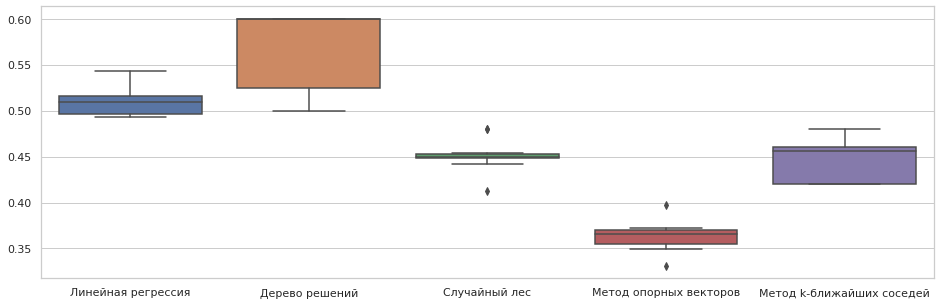

In [49]:
sns.boxplot(
    data=pd.DataFrame(
        data={
            'Линейная регрессия': -maccs_lr['test_mps'], 
            'Дерево решений': -maccs_dt['test_mps'],
            'Случайный лес': -maccs_rf['test_mps'],
            'Метод опорных векторов': -maccs_svm['test_mps'],
            'Метод k-ближайших соседей': -maccs_knn['test_mps'],
        }
    )
)

### Сравнение моделей для Morgan дескриптора

#### По метрике r-squared

<AxesSubplot:>

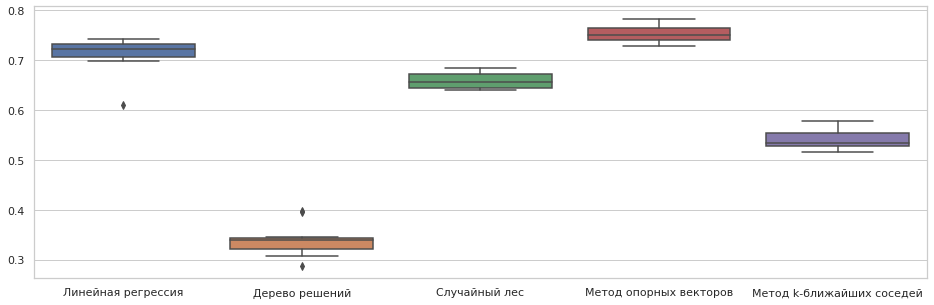

In [50]:
sns.boxplot(
    data=pd.DataFrame(
        data={
            'Линейная регрессия': morgan_lr['test_r2'], 
            'Дерево решений': morgan_dt['test_r2'],
            'Случайный лес': morgan_rf['test_r2'],
            'Метод опорных векторов': morgan_svm['test_r2'],
            'Метод k-ближайших соседей': morgan_knn['test_r2'],
        }
    )
)

#### По метрике mean absolute error

<AxesSubplot:>

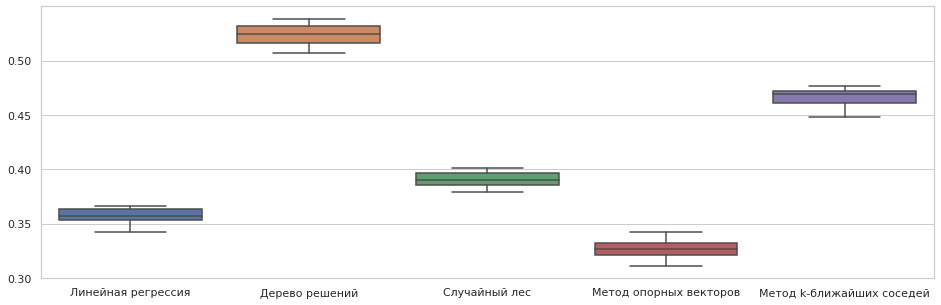

In [51]:
sns.boxplot(
    data=pd.DataFrame(
        data={
            'Линейная регрессия': -morgan_lr['test_nmae'], 
            'Дерево решений': -morgan_dt['test_nmae'],
            'Случайный лес': -morgan_rf['test_nmae'],
            'Метод опорных векторов': -morgan_svm['test_nmae'],
            'Метод k-ближайших соседей': -morgan_knn['test_nmae'],
        }
    )
)

#### По метрике max error

<AxesSubplot:>

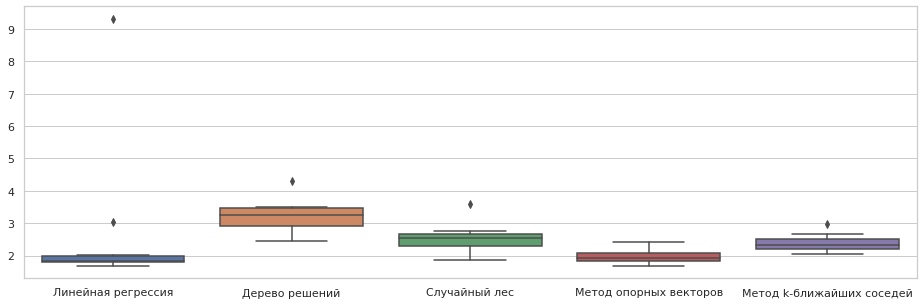

In [52]:
sns.boxplot(
    data=pd.DataFrame(
        data={
            'Линейная регрессия': -morgan_lr['test_me'], 
            'Дерево решений': -morgan_dt['test_me'],
            'Случайный лес': -morgan_rf['test_me'],
            'Метод опорных векторов': -morgan_svm['test_me'],
            'Метод k-ближайших соседей': -morgan_knn['test_me'],
        }
    )
)

#### По метрике max perc score

<AxesSubplot:>

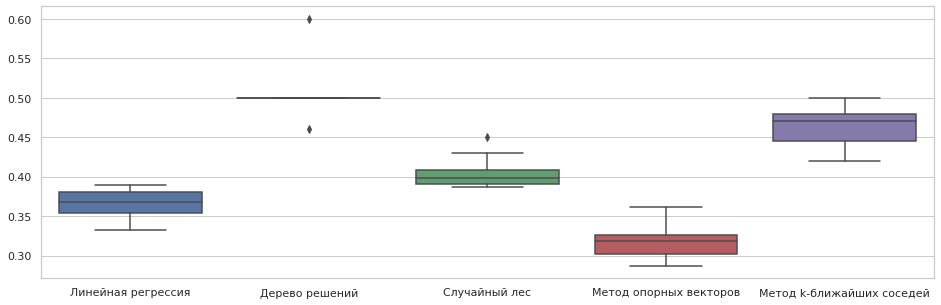

In [53]:
sns.boxplot(
    data=pd.DataFrame(
        data={
            'Линейная регрессия': -morgan_lr['test_mps'], 
            'Дерево решений': -morgan_dt['test_mps'],
            'Случайный лес': -morgan_rf['test_mps'],
            'Метод опорных векторов': -morgan_svm['test_mps'],
            'Метод k-ближайших соседей': -morgan_knn['test_mps'],
        }
    )
)

### Сравнение дескрипторов MACSS и Morgan по модели SVM

Заметим, что лучшей моделью, как по максимизирующим, так и по минимизирующим метрикам, оказался метод опорных векторов.

#### По метрике r-squared

<AxesSubplot:>

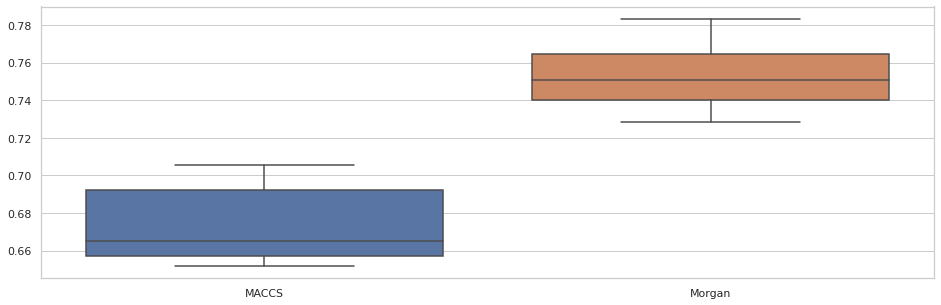

In [54]:
sns.boxplot(
    data=pd.DataFrame(
        data={
            'MACCS': maccs_svm['test_r2'],
            'Morgan': morgan_svm['test_r2']
        }
    )
)

#### По метрике mean absolute error

<AxesSubplot:>

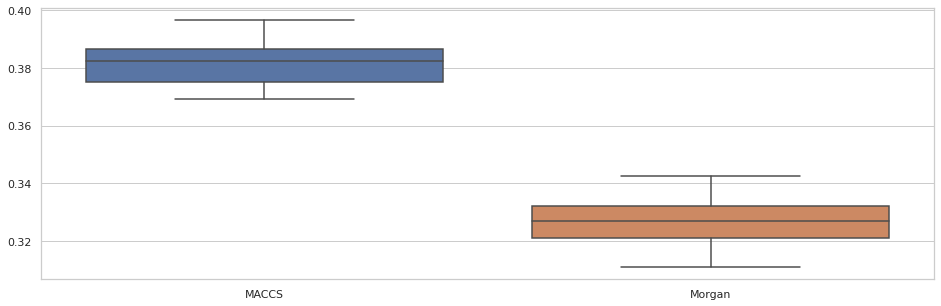

In [55]:
sns.boxplot(
    data=pd.DataFrame(
        data={
            'MACCS': -maccs_svm['test_nmae'],
            'Morgan': -morgan_svm['test_nmae']
        }
    )
)

#### По метрике max error

<AxesSubplot:>

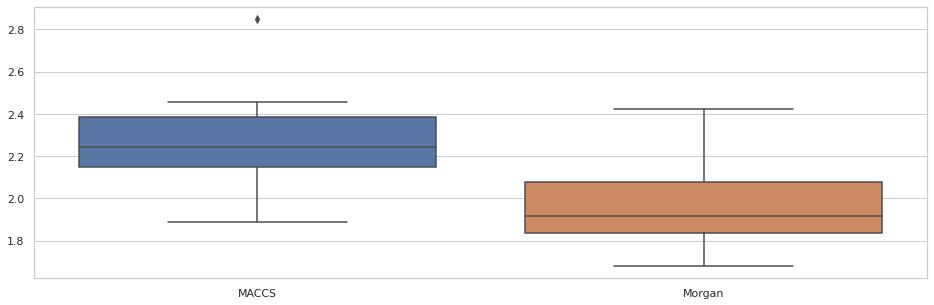

In [56]:
sns.boxplot(
    data=pd.DataFrame(
        data={
            'MACCS': -maccs_svm['test_me'],
            'Morgan': -morgan_svm['test_me']
        }
    )
)

#### По метрике max perc score

<AxesSubplot:>

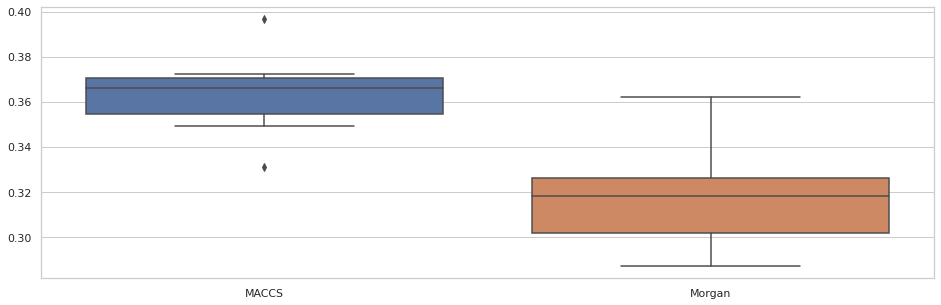

In [57]:
sns.boxplot(
    data=pd.DataFrame(
        data={
            'MACCS': -maccs_svm['test_mps'],
            'Morgan': -morgan_svm['test_mps']
        }
    )
)

## Заключение

В ходе работы над курсовым проектом:
- Изучены способы представления молекул для последующего применения машинного обучения: SMILES и дескрипторы MACCS и Morgan

- Изучена документация библиотеки RDKit для работы с дескрипторами
- По имеющимся данным о SMILES лигандов белка gp120 сгенерированы фингерпринты
- Эти фингерпринты преобразованы с помошью метода главных компонент
- Обучены модели машинного обучения: линейная регрессия, дерево решений, случайный лес из десяти деревьев, метод опорных векторов, метод $k$-ближайших соседей.
- Проведено сравнение результатов обучения моделей. Сначала между моделями для каждого дескриптора в отдельности, а затем между дескрипторами для лучшей модели.

По итогам сравнения можно сделать вывод, что обученные с использованием дескриптора Morgan модели показывают лучшее качество предсказания энергии связывания по всем опробованным метрикам.

## Список использованных источников

1. [SMILES, a chemical language and information system. 1. Introduction to methodology and encoding rules](https://pubs.acs.org/doi/abs/10.1021/ci00057a005) / David Weininger // Journal of Chemical Information and Computer Sciences. - 1988. - Vol. 28, № 1. - P. 31-36.

2. [Reoptimization of MDL keys for use in drug discovery](https://pubs.acs.org/doi/10.1021/ci010132r) / Joseph L. Durant [et al.] // Journal of Chemical Information and Computer Sciences. - 2002. - Vol. 42, № 6. - P. 1273-1280.
3. [Extended-Connectivity Fingerprints](https://pubs.acs.org/doi/abs/10.1021/ci100050t) / David Rogers, Mathew Hahn // Journal of Chemical Information and Modeling. - 2010. - Vol. 50, № 5. - P. 742-754.
4. [RDKit: Open-Source Cheminformatics Software](http://rdkit.org) [Electronic resource] / RDKit. - 2021. - Mode of access: https://rdkit.org. - Date of access: 04.10.2021.
5. [Scikit-learn: Machine Learning in Python](https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html) / Fabian Pedregosa [et al.] // Journal of Machine Learning Research. - 2011. - Vol. 12, № 85. - P. 2825-2830.